In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
import matplotlib.pylab as plt
import cv2
import numpy as np
import imutils


In [3]:
cv2.__version__

'4.1.2'

In [5]:
#@title
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

# Image READ & Write

[opencv Read an image](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)

In [3]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
im_cv = cv2.imread("rgb.png")
(h, w, d) = im_cv.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=420, height=400, depth=3


## Color Space

**Color Space** are a way to represent the color channels present in the image that gives the image that particular hue. There are several different color spaces and each has its own significance.
Some of the popular color spaces are **RGB** (Red, Green, Blue), **CMYK** (Cyan, Magenta, Yellow, Black), **HSV** (Hue, Saturation, Value), etc.


**OpenCV’s** default color space is **RGB**. However, it actually stores color in the **BGR** format. It is an additive color model where the different intensities of Blue, Green and Red give different shades of color.

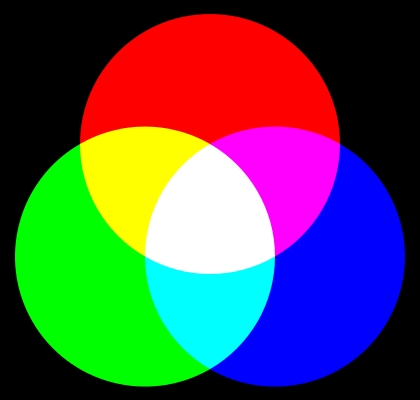

In [10]:
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
#cv2.imshow("Image", image)
#cv2.waitKey(0)
im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
showarray(im_rgb)

In [7]:
R, G, B = cv2.split(im_rgb) 
# Corresponding channels are seperated 

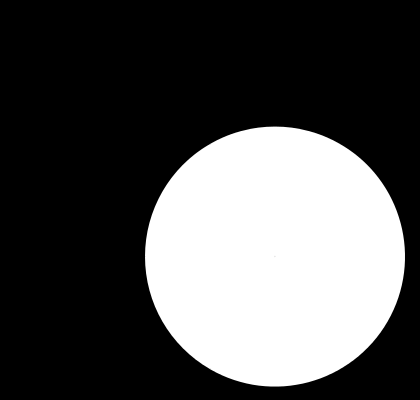

In [8]:
showarray(B)

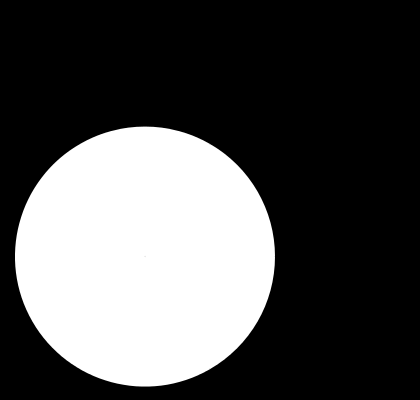

In [23]:
showarray(G)

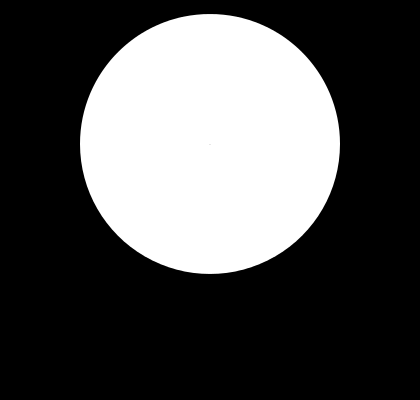

In [24]:
showarray(R)

## Read and Save Image

In [33]:
img_color = cv2.imread('bird.jpg') 
im_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 

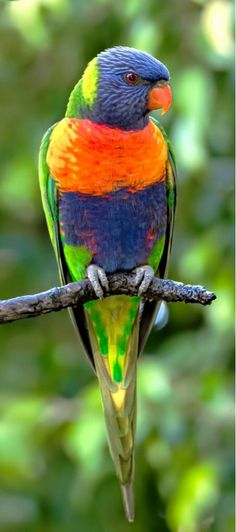

In [34]:
showarray(im_rgb)

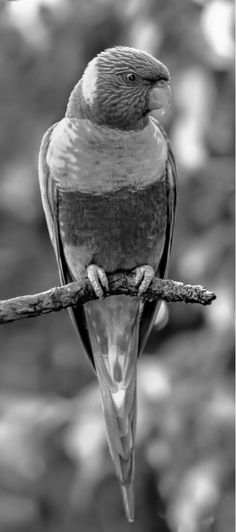

In [11]:
img_grey = cv2.imread('bird.jpg',  
                  cv2.IMREAD_GRAYSCALE)

cv2.imwrite("bird_grey.jpg", img_grey) 
showarray(img_grey)

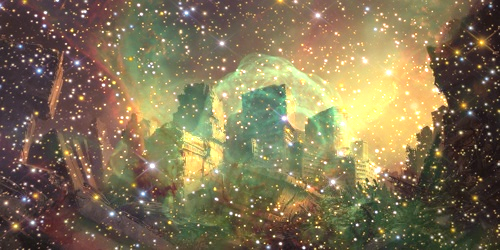

In [13]:
# path to input images are specified and   
# images are loaded with imread command  
image1 = cv2.imread('/content/1-500x250-3.jpg')  
image2 = cv2.imread('/content/2-500x250-2.jpg') 

add_cv = cv2.add(image1, image2) 
showarray(cv2.cvtColor(add_cv, cv2.COLOR_BGR2RGB) )
 

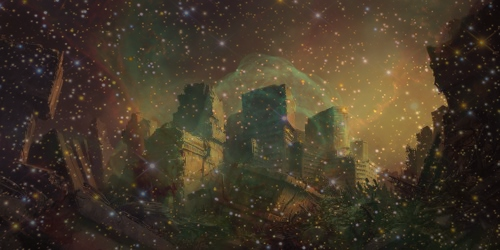

In [17]:
# cv2.addWeighted is applied over the 
# image inputs with applied parameters  
weightedSum = cv2.addWeighted(image1, 0.6, image2, 0.4, 0) 
showarray(cv2.cvtColor(weightedSum, cv2.COLOR_BGR2RGB) )

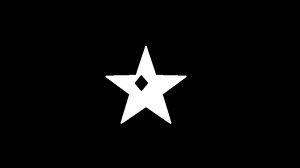

In [18]:
image1 = cv2.imread('/content/star-1-300x168.jpg')  
image2 = cv2.imread('/content/dot-300x168.jpg') 
  
# cv2.subtract is applied over the 
# image inputs with applied parameters 
sub = cv2.subtract(image1, image2) 
showarray(cv2.cvtColor(sub, cv2.COLOR_BGR2RGB) )

# Image resize
[Opencv image resize](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)

(532, 236, 3)


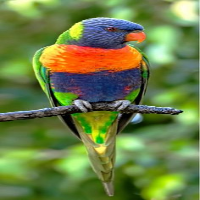

In [37]:
# resize the image to 200x200px, ignoring aspect ratio
img_color = cv2.imread('bird.jpg') 
im_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 
print(im_rgb.shape)
resized = cv2.resize(im_rgb, (200, 200))
showarray(resized)

In [ ]:
bigger = cv2.resize(im_rgb, (im_rgb.shape[1]*2, im_rgb.shape[0]*2))
print(bigger.shape)
showarray(bigger)

In [ ]:
bigger_int = cv2.resize(im_rgb, (im_rgb.shape[1]*2, im_rgb.shape[0]*2), interpolation = cv2.INTER_NEAREST)
print(bigger_int.shape)
showarray(bigger_int)

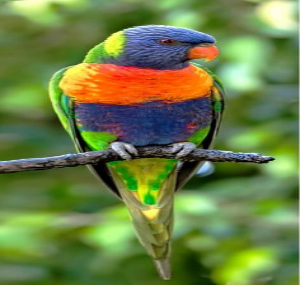

In [38]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(im_rgb, dim)
showarray(resized)

# Image ERODE

[cv2.erode](https://www.geeksforgeeks.org/python-opencv-cv2-erode-method/)

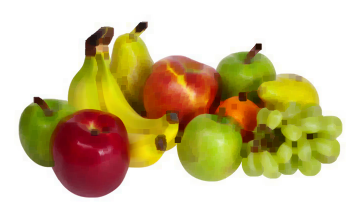

In [31]:
img_color = cv2.imread('fruits.jpg') 
im_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
# Creating kernel 
kernel = np.ones((5, 5), np.uint8) 
# Using cv2.erode() method  
im_rgb = cv2.erode(im_rgb, kernel) 
showarray(im_rgb)

# Image Bluring
[Blur](https://www.geeksforgeeks.org/python-image-blurring-using-opencv/)

Gaussian Blur


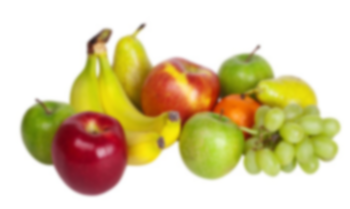

Median Blur


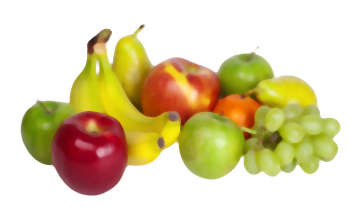

Bilateral Blur


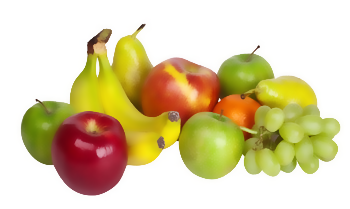

In [35]:
img_color = cv2.imread('fruits.jpg') 
image = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
print("Gaussian Blur")
showarray(Gaussian)

# Median Blur 
median = cv2.medianBlur(image, 5) 
print("Median Blur")
showarray(median)

# Bilateral Blur 
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 
print("Bilateral Blur")
showarray(bilateral)

# Image Processing

[Geometric Transformations of Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations)

## Image Cropping

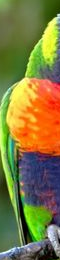

In [47]:
roi = im_rgb[40:300, 40:100]
showarray(roi)

## Image rotation

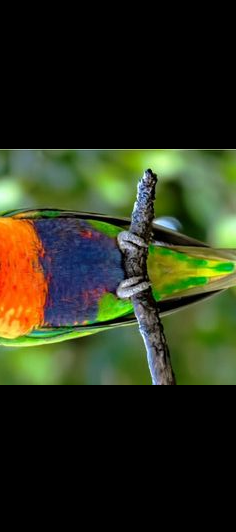

In [40]:
rows,cols, _ = im_rgb.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(im_rgb,M,(cols,rows))
showarray(dst)

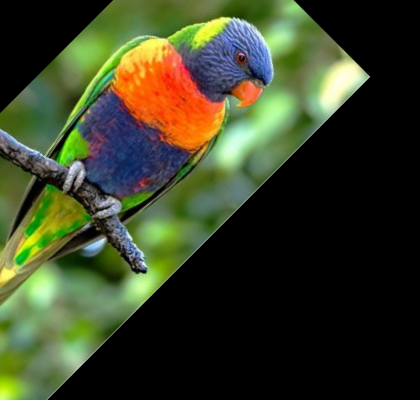

In [50]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(im_rgb, M, (w, h))
showarray(rotated)

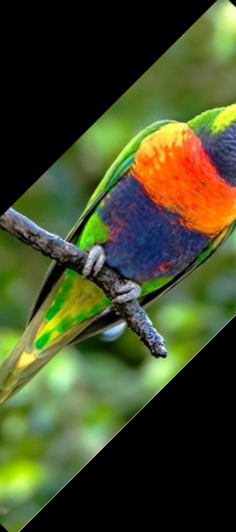

In [51]:
rotated = imutils.rotate(im_rgb, -45)
showarray(rotated)

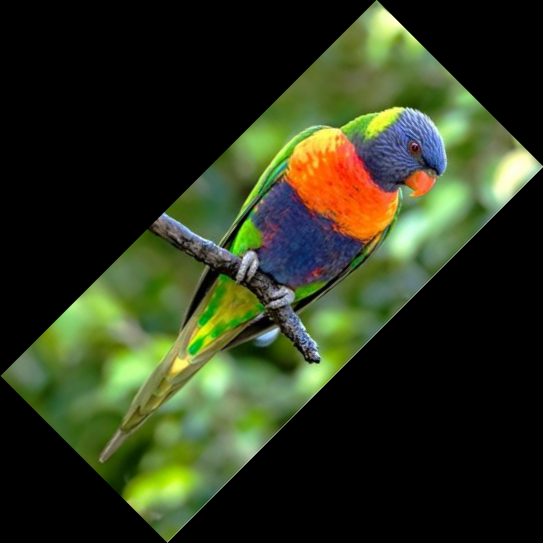

In [52]:
rotated = imutils.rotate_bound(im_rgb, 45)
showarray(rotated)

# Image Drawing

[Opencv drawing Functions](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html)

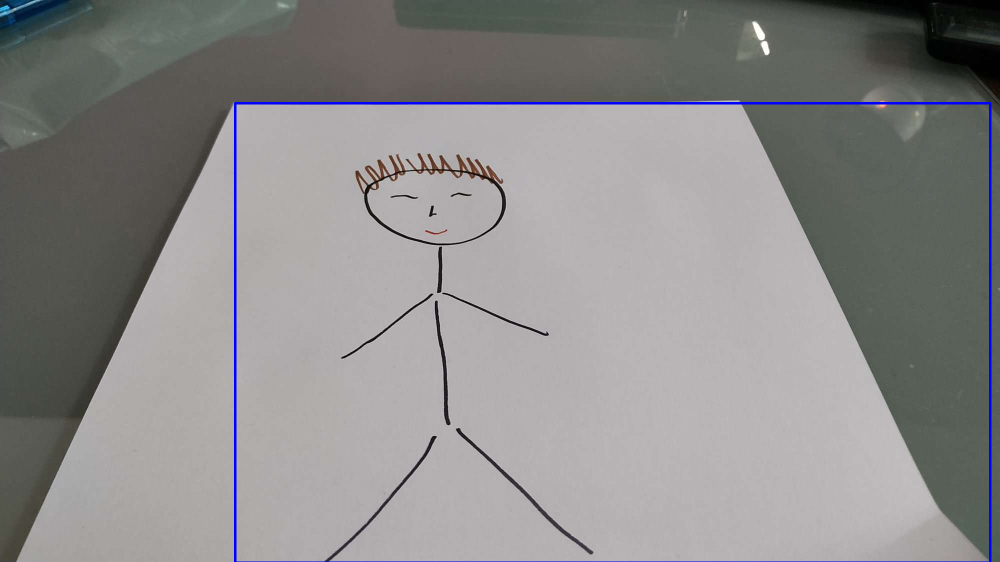

In [57]:
# draw a 2px thick red rectangle surrounding the face
img = cv2.imread('/content/paper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output = img.copy()
cv2.rectangle(output, (470, 206), (1980, 1125), (0, 0, 255), 4)

small_img = cv2.resize(output, (0,0), fx=0.5, fy=0.5) 

showarray(small_img)

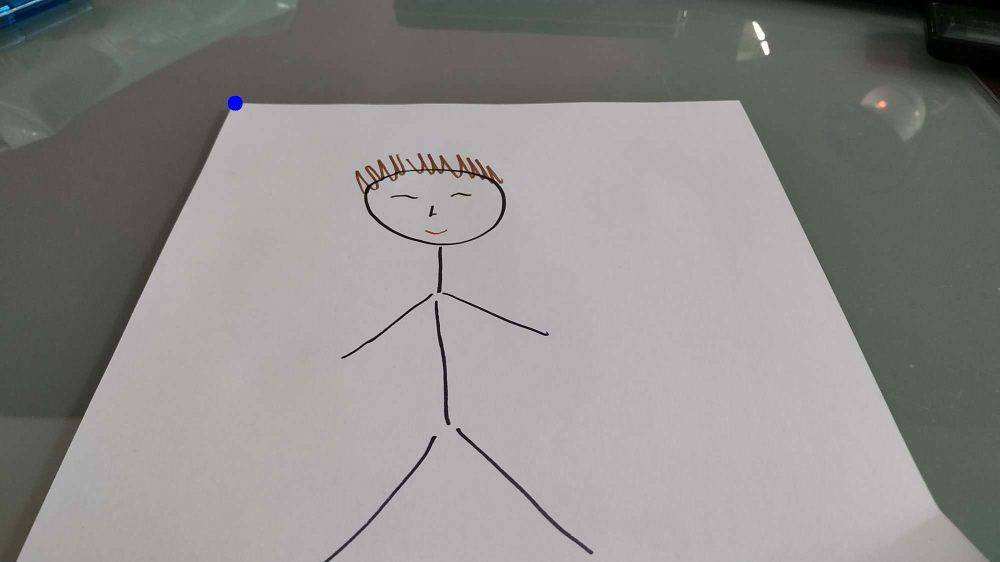

In [56]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = img.copy()
cv2.circle(output, (470, 206), 15, (0, 0, 255), -1)
small_img = cv2.resize(output, (0,0), fx=0.5, fy=0.5) 
showarray(small_img)

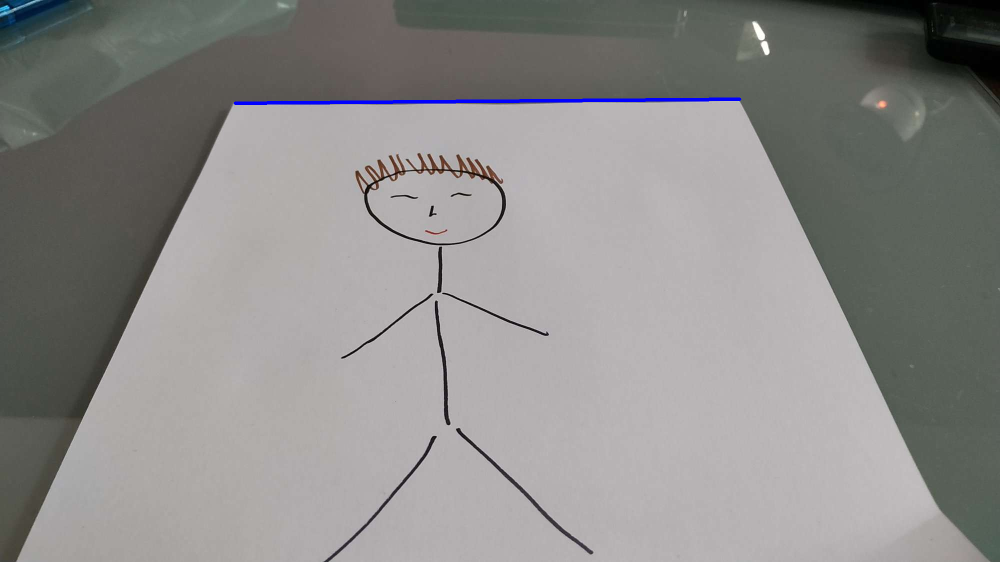

In [59]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = img.copy()
cv2.line(output, (470, 206), (1479, 198), (0, 0, 255), 5)
small_img = cv2.resize(output, (0,0), fx=0.5, fy=0.5) 
showarray(small_img)

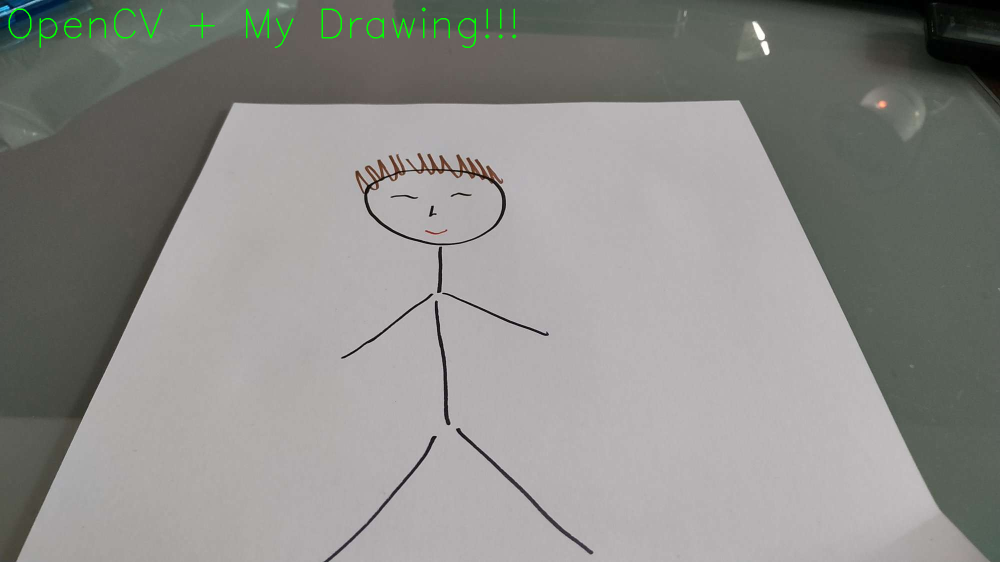

In [63]:
# draw green text on the image
output = img.copy()
cv2.putText(output, "OpenCV + My Drawing!!!", (10, 75), 
	cv2.FONT_HERSHEY_SIMPLEX, 2.7, (0, 255, 0), 2)
small_img = cv2.resize(output, (0,0), fx=0.5, fy=0.5) 
showarray(small_img)

# Perspective Transformation


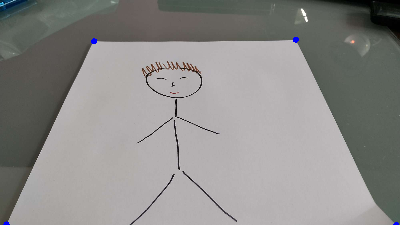

transformed


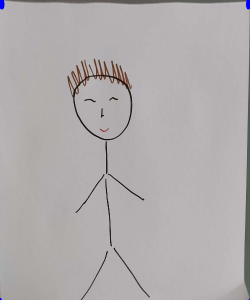

In [52]:
#Perspective Transformation
img = cv2.imread('/content/paper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.circle(img, (470, 206), 15, (0, 0, 255), -1)
cv2.circle(img, (1479, 198), 15, (0, 0, 255), -1)
cv2.circle(img, (32, 1122), 15, (0, 0, 255), -1)
cv2.circle(img, (1980, 1125), 15, (0, 0, 255), -1)

pts1 = np.float32([[470, 206], [1479, 198], [32, 1122], [1980, 1125]])
pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(img, matrix, (500, 600))

small_img = cv2.resize(img, (0,0), fx=0.2, fy=0.2) 
small_result = cv2.resize(result, (0,0), fx=0.5, fy=0.5) 

showarray(small_img)

print("transformed")
showarray(small_result)

# Edge detection

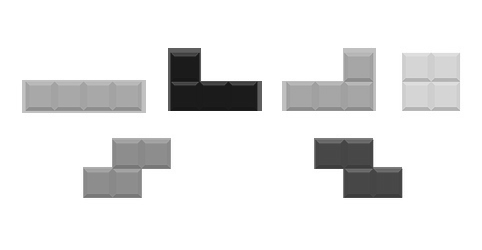

In [ ]:
block_img = cv2.imread("/content/tetris_blocks.png")
gray = cv2.cvtColor(block_img, cv2.COLOR_BGR2GRAY)
showarray(gray)

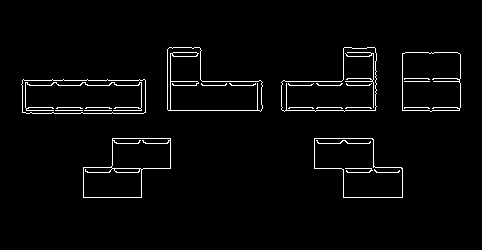

In [ ]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
showarray(edged)

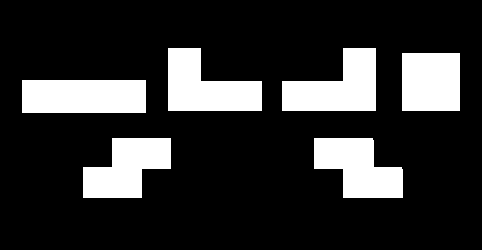

In [ ]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
showarray(thresh)

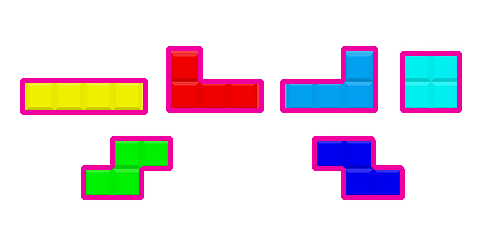

In [ ]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = block_img.copy()
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)

showarray(output)

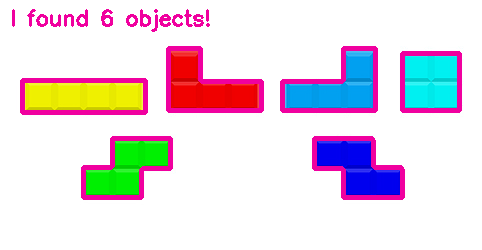

In [ ]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
showarray(output)

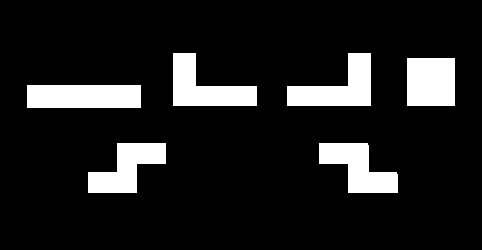

In [ ]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
showarray(mask)

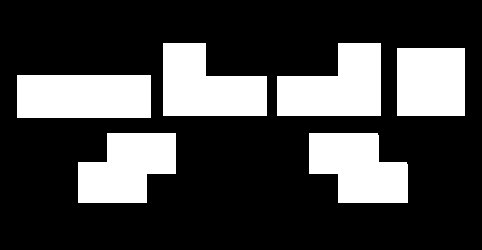

In [ ]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
showarray(mask)

# Corner Detection

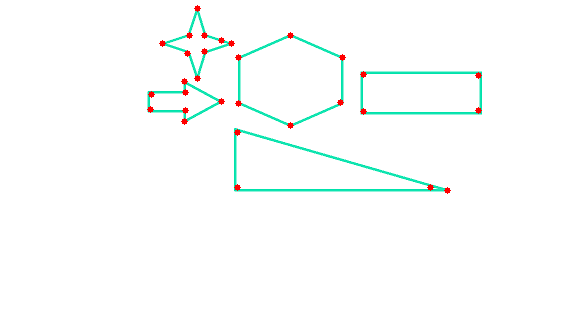

In [71]:
block_img = cv2.imread("/content/corner1.png")
  
# convert image to gray scale image 
gray = cv2.cvtColor(block_img, cv2.COLOR_BGR2GRAY)  
# detect corners with the goodFeaturesToTrack function. 
corners = cv2.goodFeaturesToTrack(gray, 30, 0.01, 10) 
corners = np.int0(corners) 
  
# we iterate through each corner,  
# making a circle at each point that we think is a corner. 
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(block_img, (x, y), 3, 255, -1)

showarray(block_img)

# Line detection

In [ ]:
img = cv2.imread("lines.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
print("edges")
showarray(edges)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
print("lines with gap")
showarray(img)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
print("lines")
showarray(img)

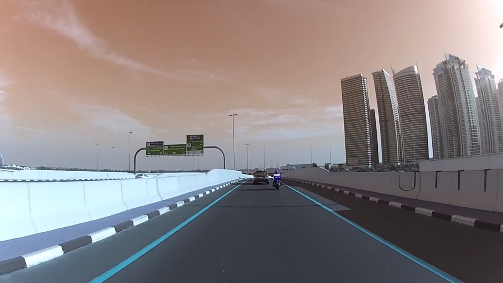

In [110]:
img = cv2.imread("/content/road1.png")
img = cv2.resize(img, (0,0), fx=0.3, fy=0.3) 
frame = cv2.GaussianBlur(img, (5, 5), 0) # apply blur
showarray(img)

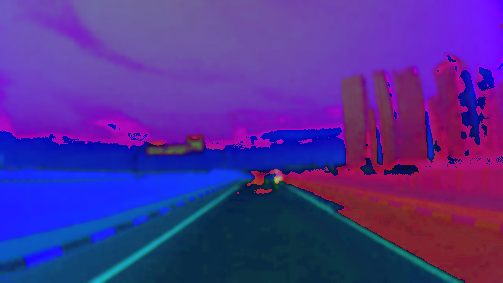

In [111]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  # convert color space
showarray(hsv)

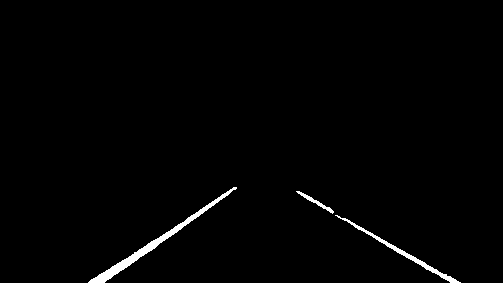

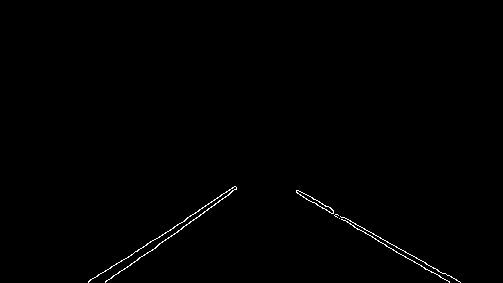

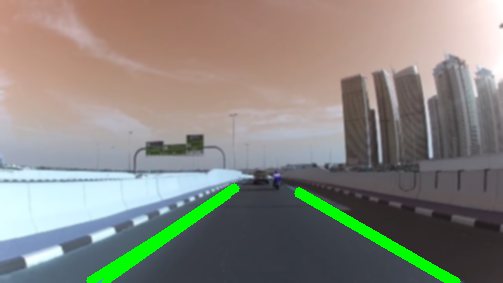

In [113]:
low_yellow = np.array([18, 90, 90])
up_yellow = np.array([90, 255, 255])
mask = cv2.inRange(hsv, low_yellow, up_yellow)
edges = cv2.Canny(mask, 75, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

showarray(mask)
showarray(edges)
showarray(frame)

Reference :
1. https://opencv-python-tutroals.readthedocs.io/
2. https://docs.opencv.org/master/d0/de3/tutorial_py_intro.html
3. https://www.geeksforgeeks.org/opencv-python-tutorial/
4. https://www.tutorialspoint.com/opencv/index.htm